# Naive Bayes

### Import needed packages

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.ensemble import IsolationForest

### EDA and outlier detection

#### Load the raw dataset

In [8]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', dtype=float, header=1)

#### Check the dataset

In [9]:
print(df.head(10))
print(df.columns)
# sns.pairplot(df)
# plt.show()
# correlation matrix
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.show()
num_negatives = (df < 0).sum().sum()
print("The number of negative elements in df is:", num_negatives)

# examine the missing values of the dataset
if df.isnull().sum().any() == 0:
    print('No missing values')
else:
    print('Missing values exist\n')
    print(df.isnull().sum())
    print(f'Percentage of missing values: {df.isnull().sum().sum() / df.size * 100:.2f}%')

# Normalize the data
# scaler = MinMaxScaler()
# scaled_df = scaler.fit_transform(df.iloc[:, 1:24])
# scaled_df = pd.DataFrame(scaled_df)
# scaled_df['Y'] = df['default payment next month']
# scaled_df.to_csv('data/scaled_df.csv', index=False)

     ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0   1.0    20000.0  2.0        2.0       1.0  24.0    2.0    2.0   -1.0   
1   2.0   120000.0  2.0        2.0       2.0  26.0   -1.0    2.0    0.0   
2   3.0    90000.0  2.0        2.0       2.0  34.0    0.0    0.0    0.0   
3   4.0    50000.0  2.0        2.0       1.0  37.0    0.0    0.0    0.0   
4   5.0    50000.0  1.0        2.0       1.0  57.0   -1.0    0.0   -1.0   
5   6.0    50000.0  1.0        1.0       2.0  37.0    0.0    0.0    0.0   
6   7.0   500000.0  1.0        1.0       2.0  29.0    0.0    0.0    0.0   
7   8.0   100000.0  2.0        2.0       2.0  23.0    0.0   -1.0   -1.0   
8   9.0   140000.0  2.0        3.0       1.0  28.0    0.0    0.0    2.0   
9  10.0    20000.0  1.0        3.0       2.0  35.0   -2.0   -2.0   -2.0   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0   -1.0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1    0.0  ... 

#### Outlier detection

 1    0.93
-1    0.07
Name: IF_is_outlier, dtype: float64
 1    0.92
-1    0.08
Name: IF_is_outlier_c, dtype: float64
 1    0.7
-1    0.3
Name: IF_is_outlier_d, dtype: float64
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'IF_is_outlier', 'IF_sores',
       'IF_is_outlier_c', 'IF_sores_c', 'IF_is_outlier_d', 'IF_sores_d'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


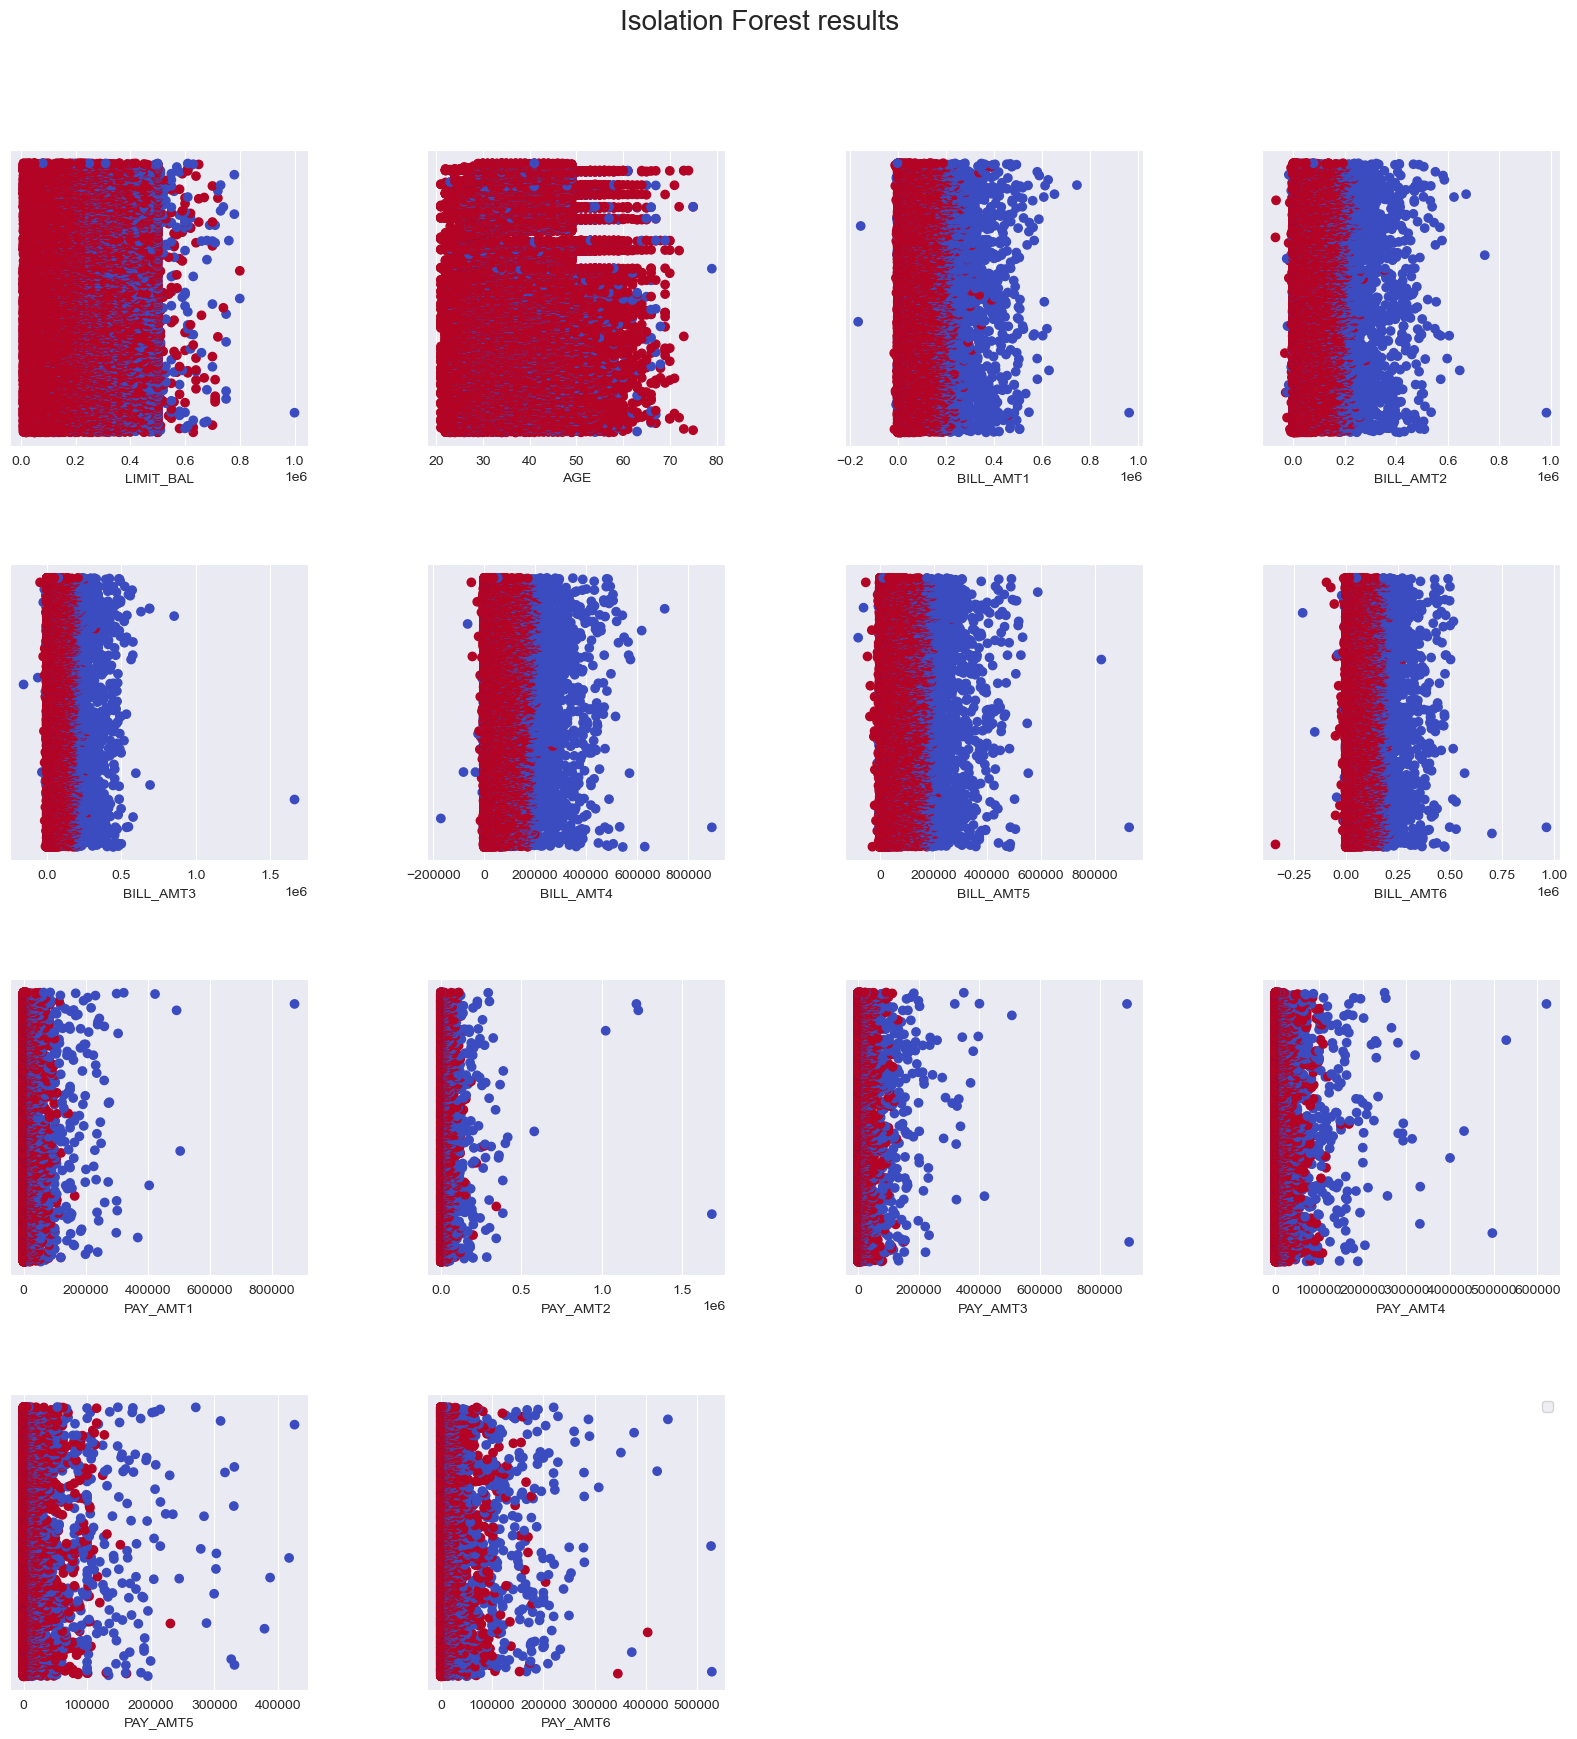

In [10]:
# examine the outliers
X = df.drop(['default payment next month', 'ID'], axis=1, inplace=False).values

X_continuous = df.drop(['default payment next month', 'ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1, inplace=False).values

X_discrete = df.drop(['default payment next month', 'ID', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
                      'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                      'PAY_AMT4',
                      'PAY_AMT5', 'PAY_AMT6'], axis=1, inplace=False).values
clf = IsolationForest(n_estimators=80, contamination='auto', random_state=42)
clf.fit(X)
IF_is_outlier = clf.predict(X)
df['IF_is_outlier'] = IF_is_outlier
df['IF_sores'] = clf.decision_function(X)
clf.fit(X_continuous)
IF_is_outlier_c = clf.predict(X_continuous)
df['IF_is_outlier_c'] = IF_is_outlier_c
df['IF_sores_c'] = clf.decision_function(X_continuous)
clf.fit(X_discrete)
IF_is_outlier_d = clf.predict(X_discrete)
df['IF_is_outlier_d'] = IF_is_outlier_d
df['IF_sores_d'] = clf.decision_function(X_discrete)


print(round(df['IF_is_outlier'].value_counts('auto'), 2))
print(round(df['IF_is_outlier_c'].value_counts('auto'), 2))
print(round(df['IF_is_outlier_d'].value_counts('auto'), 2))

# visualize the outliers according to all columns

fig, axs = plt.subplots(4, 4, figsize=(20, 20), sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.suptitle('Isolation Forest results', fontsize=20, y=0.95)

axs = axs.flatten()
print(df.columns)
df.drop(columns=['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                 'default payment next month', 'IF_is_outlier', 'IF_sores', 'IF_sores_c', 'IF_is_outlier_d',
                 'IF_sores_d'], inplace=True)
for i, ax in enumerate(axs):
    if i < 14:
        ax.scatter(df.iloc[:, i], np.arange(len(df)), c=IF_is_outlier_c,
                   cmap='coolwarm')
        ax.set_xlabel(df.columns[i])
        ax.set_yticks([])

    else:
        ax.axis('off')
plt.legend()
plt.show()


### Load the dataset
In this way, we can repalce the dataset with enhanced dataset later.

In [11]:
df = pd.read_csv('data/scaled_df.csv')

### Split the dataset into training and testing sets

In [12]:
# Step 1: Load the dataset
training_data = pd.read_csv('data/train.csv')

# training_data = pd.read_csv('data/balanced_train_data.csv')
validation_data = pd.read_csv('data/validation.csv')
test_data = pd.read_csv('data/test.csv')

scaler = MinMaxScaler()
training_data = pd.DataFrame(scaler.fit_transform(training_data))
validation_data = pd.DataFrame(scaler.fit_transform(validation_data))
test_data = pd.DataFrame(scaler.fit_transform(test_data))

# Step 2: Split the data into features and target
x_train = training_data.iloc[:, 1:-1]  # Features
y_train = training_data.iloc[:, -1]  # Target
x_val = validation_data.iloc[:, 1:-1]  # Features
y_val = validation_data.iloc[:, -1]  # Target
x_test = test_data.iloc[:, 1:-1]  # Features
y_test = test_data.iloc[:, -1]  # Target

### Fit the Naive Bayes models

#### Gaussian Naive Bayes

In [13]:
# Create a figure with 2x3 subplots
fig_coma = plt.figure(figsize=(15, 10))
fig_coma.suptitle('Results for Naive Bayes classifiers', fontsize=16)
gs = GridSpec(2, 3, figure=fig_coma, wspace=0.2, hspace=0.5)
ax_1 = fig_coma.add_subplot(gs[0, 0], aspect='equal')
ax_2 = fig_coma.add_subplot(gs[0, 1], aspect='equal')
ax_3 = fig_coma.add_subplot(gs[0, 2], aspect='equal')
ax_4 = fig_coma.add_subplot(gs[1, 0], aspect='equal')
ax_5 = fig_coma.add_subplot(gs[1, 1], aspect='equal')
ax_6 = fig_coma.add_subplot(gs[1, 2], aspect='equal')

# Fit Naive Bayes to transformed data
print('\n{:-^60s}'.format('Gaussian Naive Bayes'))
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_val)

print('Accuracy for Gaussian Naive Bayes:', accuracy_score(y_val, y_pred_gnb))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_gnb))
print(classification_report(y_val, y_pred_gnb))
sns.heatmap(confusion_matrix(y_val, y_pred_gnb), ax=ax_1, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_1.set_title('Gaussian Naive Bayes \n confusion matrix')
ax_1.set_xlabel(f'Accuracy: {round(accuracy_score(y_val, y_pred_gnb), 2)}')

fig = fig_coma
plt.close()


--------------------Gaussian Naive Bayes--------------------
Accuracy for Gaussian Naive Bayes: 0.7575684185032695
Confusion matrix:
[[2621  593]
 [ 408  507]]
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      3214
         1.0       0.46      0.55      0.50       915

    accuracy                           0.76      4129
   macro avg       0.66      0.68      0.67      4129
weighted avg       0.78      0.76      0.77      4129



#### Multinomial Naive Bayes

In [14]:
# Fit Multinomial Naive Bayes to training data
print('\n{:-^60s}'.format('Multinomial Naive Bayes'))
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_val)

print('Accuracy for Multinomial Naive Bayes:', accuracy_score(y_val, y_pred_mnb))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_mnb))
print(classification_report(y_val, y_pred_mnb))
sns.heatmap(confusion_matrix(y_val, y_pred_mnb), ax=ax_2, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_2.set_title('Multinomial Naive Bayes \n confusion matrix')
ax_2.set_xlabel(f'Accuracy: {round(accuracy_score(y_val, y_pred_mnb), 2)}')

fig = fig_coma


------------------Multinomial Naive Bayes-------------------
Accuracy for Multinomial Naive Bayes: 0.7783967062242674
Confusion matrix:
[[3214    0]
 [ 915    0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      3214
         1.0       0.00      0.00      0.00       915

    accuracy                           0.78      4129
   macro avg       0.39      0.50      0.44      4129
weighted avg       0.61      0.78      0.68      4129



/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Bernoulli Naive Bayes

In [15]:
# Fit Bernoulli Naive Bayes to training data
print('\n{:-^60s}'.format('Bernoulli Naive Bayes'))
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_val)

print('Accuracy for Bernoulli Naive Bayes:', accuracy_score(y_val, y_pred_bnb))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_bnb))
print(classification_report(y_val, y_pred_bnb))
sns.heatmap(confusion_matrix(y_val, y_pred_bnb), ax=ax_3, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_3.set_title('Bernoulli Naive Bayes \nconfusion matrix')
ax_3.set_xlabel(f'Accuracy: {round(accuracy_score(y_val, y_pred_bnb), 2)}')

fig = fig_coma


-------------------Bernoulli Naive Bayes--------------------
Accuracy for Bernoulli Naive Bayes: 0.7503027367401308
Confusion matrix:
[[2952  262]
 [ 769  146]]
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      3214
         1.0       0.36      0.16      0.22       915

    accuracy                           0.75      4129
   macro avg       0.58      0.54      0.54      4129
weighted avg       0.70      0.75      0.71      4129



#### Categorical Naive Bayes

In [16]:
# # Use GMM to transform training and testing data
# x_train_gmm = gmm.predict_proba(x_train)
# x_test_gmm = gmm.predict_proba(x_val)

# Fit the Categorical Naive Bayes to the training dataset
print('\n{:-^60s}'.format('Categorical Naive Bayes'))
catenb = CategoricalNB(min_categories=23)
catenb.fit(x_train, y_train)
y_pred_catenb = catenb.predict(x_val)
print('Accuracy for Categorical Naive Bayes:', accuracy_score(y_val, y_pred_catenb))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_catenb))
print(classification_report(y_val, y_pred_catenb))
sns.heatmap(confusion_matrix(y_val, y_pred_catenb), ax=ax_4, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_4.set_title('Categorical Naive Bayes \n confusion matrix')
ax_4.set_xlabel(f'Accuracy: {round(accuracy_score(y_val, y_pred_catenb), 2)}')

fig = fig_coma


------------------Categorical Naive Bayes-------------------
Accuracy for Categorical Naive Bayes: 0.7779123274400581
Confusion matrix:
[[3211    3]
 [ 914    1]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      3214
         1.0       0.25      0.00      0.00       915

    accuracy                           0.78      4129
   macro avg       0.51      0.50      0.44      4129
weighted avg       0.66      0.78      0.68      4129



#### Complement Naive Bayes

In [17]:
# Fit the Complement Naive Bayes to the training dataset
print('\n{:-^60s}'.format('Complement Naive Bayes'))
comenb = ComplementNB()
comenb.fit(x_train, y_train)
y_pred_comenb = comenb.predict(x_val)
print('Accuracy for Complement Naive Bayes:', accuracy_score(y_val, y_pred_comenb))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_comenb))
print(classification_report(y_val, y_pred_comenb))
sns.heatmap(confusion_matrix(y_val, y_pred_comenb), ax=ax_5, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_5.set_title('Complement Naive Bayes \n confusion matrix')
ax_5.set_xlabel(f'Accuracy: {round(accuracy_score(y_val, y_pred_comenb), 2)}')

fig = fig_coma


-------------------Complement Naive Bayes-------------------
Accuracy for Complement Naive Bayes: 0.6352627754904335
Confusion matrix:
[[2035 1179]
 [ 327  588]]
              precision    recall  f1-score   support

         0.0       0.86      0.63      0.73      3214
         1.0       0.33      0.64      0.44       915

    accuracy                           0.64      4129
   macro avg       0.60      0.64      0.58      4129
weighted avg       0.74      0.64      0.67      4129



#### Gaussian Mixture Model

In [18]:
# Fit the Gaussian Mixture Model to the training dataset
print('\n{:-^60s}'.format('Gaussian Mixture Model'))
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(x_train)
y_pred_gmm = gmm.predict(x_val)
print('Accuracy for Gaussian Mixture Model:', accuracy_score(y_val, y_pred_gmm))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_gmm))
print(classification_report(y_val, y_pred_gmm))
sns.heatmap(confusion_matrix(y_val, y_pred_gmm), ax=ax_6, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_6.set_title('Gaussian Mixture Model \n confusion matrix')
ax_6.set_xlabel(f'Accuracy: {round(accuracy_score(y_val, y_pred_gmm), 2)}')

fig = fig_coma


-------------------Gaussian Mixture Model-------------------
Accuracy for Gaussian Mixture Model: 0.5771373213853234
Confusion matrix:
[[2010 1204]
 [ 542  373]]
              precision    recall  f1-score   support

         0.0       0.79      0.63      0.70      3214
         1.0       0.24      0.41      0.30       915

    accuracy                           0.58      4129
   macro avg       0.51      0.52      0.50      4129
weighted avg       0.67      0.58      0.61      4129



### Visualize the confusion matrix for all Naive Bayes models

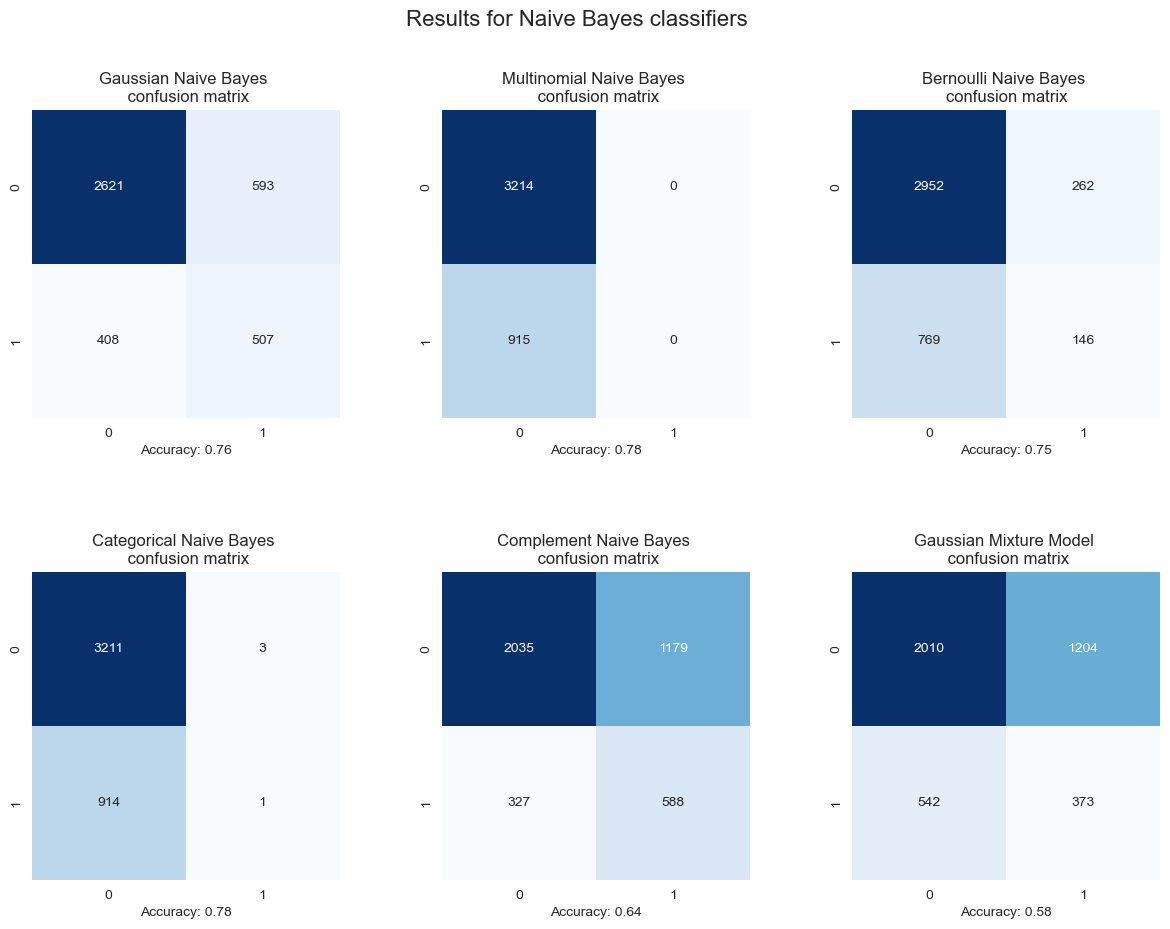

In [19]:
fig

### Use GridSearchCV to find the best parameters for each Naive Bayes model
The code cell takes the Gussian Naive Bayes model as an example. The code cell for the other Naive Bayes models is similar.

In [20]:
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()
# nb_classifier = MultinomialNB()
# nb_classifier = BernoulliNB()
# nb_classifier = CategoricalNB()
# nb_classifier = ComplementNB()
# nb_classifier = GaussianMixture()


params = {'var_smoothing': np.logspace(0,-9, num=1000)}
gs = GridSearchCV(estimator=nb_classifier,
                 param_grid=params, 
                 cv=8,
                 verbose=1, 
                 scoring='accuracy') 
gs.fit(x_train, y_train)

gs.best_params_

Fitting 8 folds for each of 1000 candidates, totalling 8000 fits


{'var_smoothing': 0.06604193962330306}

### Use the best parameters to fit the Naive Bayes models

In [21]:
# Fit Naive Bayes to transformed data
print('\n{:-^60s}'.format('Gaussian Naive Bayes'))
gnb = GaussianNB(var_smoothing=0.06604193962330306)
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_val)


print('Accuracy for MultinomialNB:', accuracy_score(y_val, y_pred_gnb))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_gnb))
print(classification_report(y_val, y_pred_gnb))
sns.heatmap(confusion_matrix(y_val, y_pred_gnb), ax=ax_1, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_1.set_title('MultinomialNB \n confusion matrix')
ax_1.set_xlabel(f'Accuracy: {round(accuracy_score(y_val, y_pred_gnb), 2)}')


--------------------Gaussian Naive Bayes--------------------
Accuracy for MultinomialNB: 0.7980140469847421
Confusion matrix:
[[2994  220]
 [ 614  301]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      3214
         1.0       0.58      0.33      0.42       915

    accuracy                           0.80      4129
   macro avg       0.70      0.63      0.65      4129
weighted avg       0.77      0.80      0.78      4129



Text(0.5, 544.7222222222224, 'Accuracy: 0.8')

### Evaluate the Naive Bayes models on the test set

In [22]:
# Evaluation on the test set
print('\n{:-^60s}'.format('Gaussian Naive Bayes'))
gnb = GaussianNB(var_smoothing=0.06604193962330306)
gnb.fit(x_train, y_train)
y_pred_gnb= gnb.predict(x_test)

print('Accuracy for MultinomialNB:', accuracy_score(y_test, y_pred_gnb))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), ax=ax_1, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_1.set_title('MultinomialNB \n confusion matrix')
ax_1.set_xlabel(f'Accuracy: {round(accuracy_score(y_test, y_pred_gnb), 2)}')


--------------------Gaussian Naive Bayes--------------------
Accuracy for MultinomialNB: 0.8021791767554479
Confusion matrix:
[[2988  195]
 [ 622  325]]
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      3183
         1.0       0.62      0.34      0.44       947

    accuracy                           0.80      4130
   macro avg       0.73      0.64      0.66      4130
weighted avg       0.78      0.80      0.78      4130



Text(0.5, 544.7222222222224, 'Accuracy: 0.8')

### Results for each Naive Bayes model using the best parameters
#### Best parameters for each Naive Bayes model
the best parameters for the Gaussian Mixture Model is {'n_components':10, 'covariance_type': 'full'}
the best parameters for the Gaussian Naive Bayes is {'var_smoothing': 0.06604193962330306}
the best parameters for the Multinomial Naive Bayes is {'alpha': 1}
the best parameters for the Bernoulli Naive Bayes is {'alpha': 1}
the best parameters for the Categorical Naive Bayes is {'alpha': 1}
the best parameters for the Complement Naive Bayes is {'alpha': 1.893552179756295}
#### Resutls for each Naive Bayes model using the best parameters
Accuracy for Gaussian Mixture Model: 0
Accuracy for Gaussian Naive Bayes: 0.80
Accuracy for Multinomial Naive Bayes: 0.78
Accuracy for Bernoulli Naive Bayes: 0.75
Accuracy for Categorical Naive Bayes: 0.78
Accuracy for Complement Naive Bayes: 0.63